 # 2019-2020 Ladies 1500 Meter Results
 Dataset includes personal best for every skater in the 2019-2020 season for 1500 m.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math

In [24]:
# Load Data
results = pd.read_csv('ladies-1500-2019-2020.csv')
results.sample(5)

,rank,name,age,country,time,track,date
1010,1011,Hina Fujioka,L?,JPN,"2.18,13",Nagano (JPN),2/3/2020
1152,1153,Shuo Liu (2002),LA1,CHN,"2.20,26",Changchun (CHN),9/22/2019
1178,1179,Olga Sokolova,LYB,RUS,"2.20,58",Moscow (RUS),2/11/2020
3089,3090,Khalida Vorobyova,L70,RUS,"3.11,56",Kolomna (RUS),2/29/2020
632,633,Tessa Huttenhuis,LA2,NED,"2.12,34",Heerenveen (NED),2/29/2020


In [25]:
# Drop Null Values
results = results.dropna()

results.isnull().values.any()

False

In [26]:
# Convert time to proper form and cast to float
results['time']= results['time'].str.replace(',', '').astype('float')
results

,rank,name,age,country,time,track,date
0,1,Miho Takagi,LSA,JPN,1.5033,Calgary (CAN),2/8/2020
1,2,Ireen Wüst,L30,NED,1.5092,Salt Lake City (USA),2/16/2020
2,3,Evgeniia Lalenkova,LSA,RUS,1.5113,Salt Lake City (USA),2/16/2020
3,4,Elizaveta Kazelina,LN4,RUS,1.5141,Salt Lake City (USA),2/16/2020
4,5,Ivanie Blondin,L30,CAN,1.5176,Calgary (CAN),2/8/2020
...,...,...,...,...,...,...,...
3312,3313,Ronja Siren Hagen,LYB,NOR,4.4151,Geithus (NOR),2/5/2020
3313,3314,Eevi Koivupuisto,LYF,FIN,4.5549,Seinäjoki (FIN),3/7/2020
3314,3315,Viktoria Tuulas,L50,EST,5.0873,Tallinn (EST),3/7/2020
3315,3316,Angelika Hotvedt,LYB,NOR,5.2509,Geithus (NOR),2/5/2020


# Goal-manipulate time format
most promising methods below

In [27]:
results.dtypes

rank        object
name        object
age         object
country     object
time       float64
track       object
date        object
dtype: object

In [4]:
try_this = results
try_this

try_this.isnull().values.any()

#try_this['split'] = math.modf(try_this['time'])

#math.modf(x)

False

# make change

# Goal-manipulate time format
most promising methods below

In [27]:
x = try_this['time'].str.split('.',expand=True)
x

,0,1
0,1,5033
1,1,5092
2,1,5113
3,1,5141
4,1,5176
...,...,...
3312,4,4151
3313,4,5549
3314,5,0873
3315,5,2509


In [21]:
4000/(300*4)


3.3333333333333335

In [32]:
 a = 1
 b = 47

60 * (a) + b

107

In [22]:
x = 1.5678
math.modf(x)

(0.5678000000000001, 1.0)

In [ ]:
# get into proper time format-read float as minute
#results['converted']= 
#str(dt.timedelta(minutes=results['secs'])[:-3])
#results.head()


x=1098
(str(dt.timedelta(minutes=x))[:-3])

In [ ]:
to try
df = df.astype(str)
for c in df:
    df[c] = (df[c].str[:2] + '.' + df[c].str[2:]).astype(float)
print(df)

In [39]:
# Check stats for time
results['time'].describe()

count    3317.000000
mean        2.363873
std         0.377915
min         1.503300
25%         2.154200
50%         2.278900
75%         2.435800
max         5.294500
Name: time, dtype: float64

# Visulize 1500 Time

Text(0.5, 1.0, 'Global 1500 Meters Times')

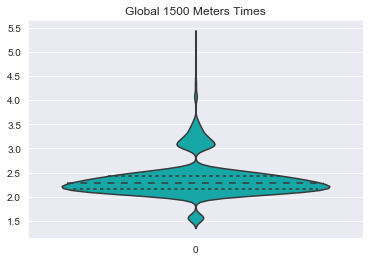

In [42]:
# Plot Stats for Time
sns.set_style('darkgrid')
sns.violinplot(data=results['time'],color='c',inner='quartile').set_title('Global 1500 Meters Times')

In [ ]:
141.8323/60

# Setting up time scale

In [ ]:
results.groupby('age').count()

# Which Countries have the most speedskaters?

In [ ]:
# Groupby Country
country_counts= results.groupby('country').count().reset_index()
# Just selected needed columns
country_counts= country_counts[['country','rank']].copy()
# Rename column
country_counts.columns = ['Country','Count']
country_counts.tail()
# ascending order
country_counts.sort_values(by=['Count'])

# Now just Display countries over 5 skaters
country_counts = country_counts[country_counts['Count']>7]
country_counts.dtypes

# Visulize Country Count 
Countires with more then 10 skaters

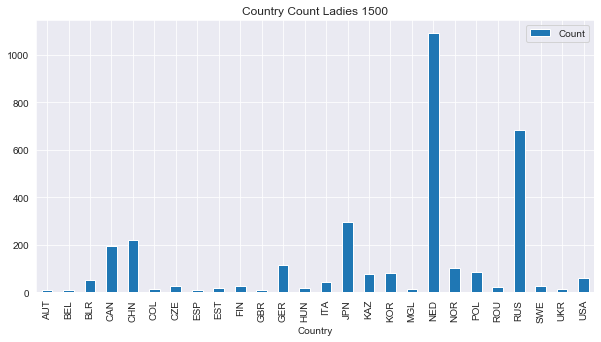

In [43]:
# Use Pandas Plot.
ax = country_counts.plot.bar(x='Country',y='Count',figsize=(10,5),grid=True,title='Country Count Ladies 1500')

# Age Divsions

In [ ]:
# Groupby Age
age = results.groupby('age').count().reset_index()
# Just select needed column
age = age[['age','rank']].copy()
#Rename columns
age.columns=[['age','count']]
# age.drop.iloc[11] TODO delete unknown age
age.dtypes
age = age[1:3]
age

# Plot by Age Divsion

In [ ]:
ax = age.plot.bar(x='age',y='count')#,figsize=(10,5),grid=True,title='Age Divsions')
ax
#TODO FIX

# By Track

In [ ]:
# Groupby Track
track = results.groupby('track').count().reset_index()
track= track[track['rank']>20]

# American Times
make df for just americans

In [ ]:
usa= results[results['country']=='USA']
usa

In [29]:
usa.head()

,rank,name,age,country,time,track,date
14,15,Brittany Bowe,L30,USA,1.5420,Salt Lake City (USA),2/16/2020
24,24,Kimi Goetz,LSA,USA,1.5525,Salt Lake City (USA),2/16/2020
27,28,Mia Kilburg-Manganello,L30,USA,1.5563,Calgary (CAN),2/8/2020
40,41,Brianna Bocox,LN4,USA,1.5717,Milwaukee (USA),2/1/2020
64,65,Paige Schwartzburg,LSA,USA,1.5934,Salt Lake City (USA),12/29/2019


In [31]:
# USA sumstats

stats = usa['time'].describe()
stats = stats[3:]
stats


min    1.5420
25%    2.0778
50%    2.2069
75%    2.3969
max    3.2698
Name: time, dtype: float64

## American 1500 M Quartiles

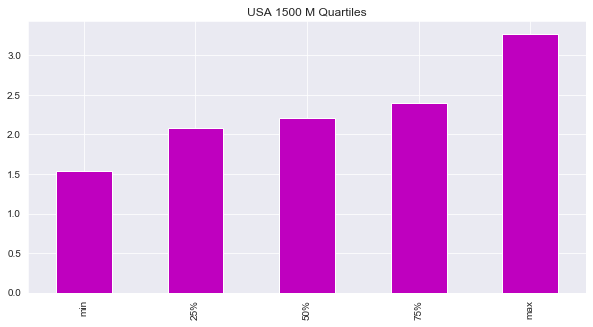

In [33]:
ax = stats.plot.bar(stats,figsize=(10,5),grid=True,title='USA 1500 M Quartiles',color='m')

In [ ]:
#top_6 =usa[:6]
#top_6


top_6['secs']= results['time']*60
top_6

# Distribution of Times

In [ ]:
#ax = sns.violinplot(x=['times'])

#sns.boxplot(data=usa['time'],grid=True)
#ax
#sns.boxplot(data=results['time'])


sns.violinplot(data=results['time'],grid=True)

#sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)


In [34]:
x = usa['time'].tolist()

Text(0.5, 1.0, 'USA 1500 Meters')

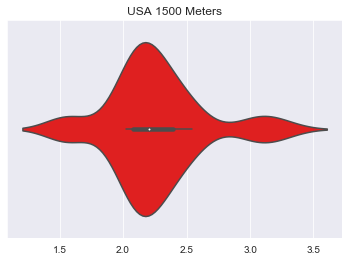

In [44]:
sns.violinplot(x,color='r').set_title('USA 1500 Meters')

In [ ]:
ax = track.plot.bar(x="track", y="rank",grid=True,title='Country Count Ladies 1500',markers=True)

# Times

In [ ]:
ax = times.plot.line(x='name', y='secs',grid=True,title='1500',rot='45',figsize=(30,3),marker= 'o')
ax

In [ ]:
ax = times.plot.line(x='name', y='time',grid=True,title='Country Count Ladies 1500',rot='90',figsize=(10,3))
ax